<a href="https://colab.research.google.com/github/ShivaniBebi/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=titanic_data)

https://docs.google.com/spreadsheets/d/1zMApo79pGJXseh-nSLuIB7GdZscHBTT_oS6to9OqEG4/edit#gid=0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
titanic_data=pd.read_csv("/content/train.csv")

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Numbers of rows and columns**

In [ ]:
titanic_data.shape

(891, 12)

# **Getting some information about the data**

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **check the number of missing values in each columns**

In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_data=titanic_data.drop(columns="Cabin",axis=1)

In [ ]:
titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)

/tmp/ipython-input-20-3476616426.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)


In [ ]:
print(titanic_data["Embarked"].mode())
print(titanic_data["Embarked"].mode()[0])

0    S
Name: Embarked, dtype: object
S


**replace the missing vaalue in'Embarked' column with mode value**


In [ ]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)

/tmp/ipython-input-22-1870720879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)


In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **Data analysis**

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
sns.set()

In [ ]:
titanic_data["Survived"].value_counts()

,count
Survived,
0,549
1,342


/tmp/ipython-input-28-3718556916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=titanic_data, palette='Set2')


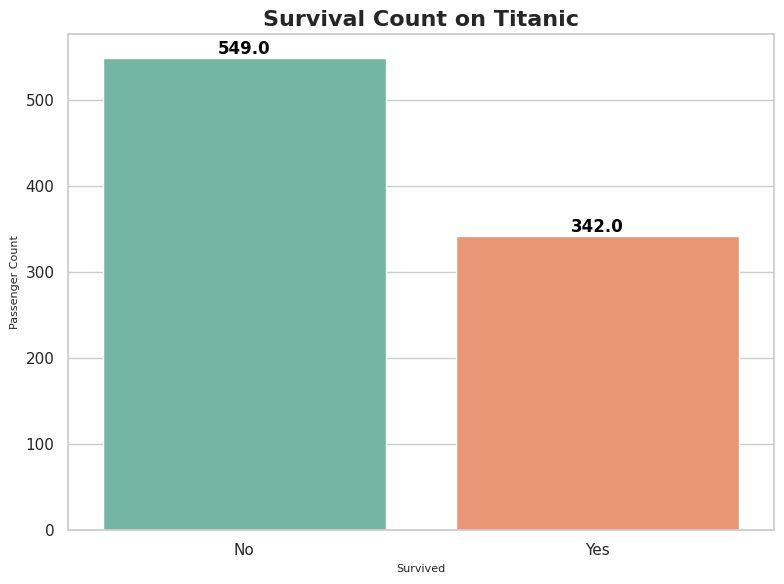

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', data=titanic_data, palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, color='black', weight='bold')

plt.title('Survival Count on Titanic', fontsize=16, fontweight='bold')
plt.xlabel('Survived', fontsize=8)
plt.ylabel('Passenger Count', fontsize=8)
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

In [ ]:
titanic_data["Sex"].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

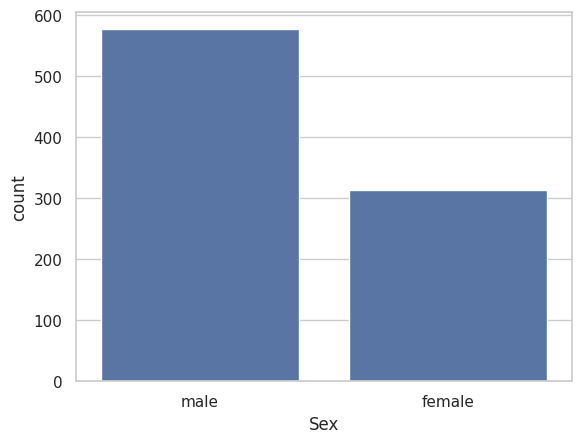

In [ ]:
sns.countplot(x="Sex",data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

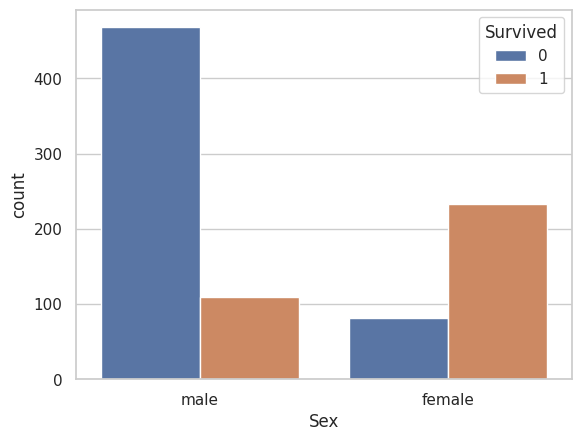

In [ ]:
sns.countplot(x="Sex",hue="Survived",data=titanic_data )


In [ ]:
titanic_data["Pclass"].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass', ylabel='count'>

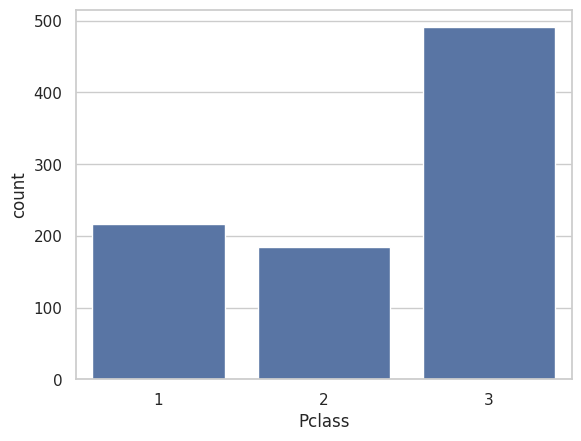

In [ ]:
sns.countplot(x="Pclass",data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

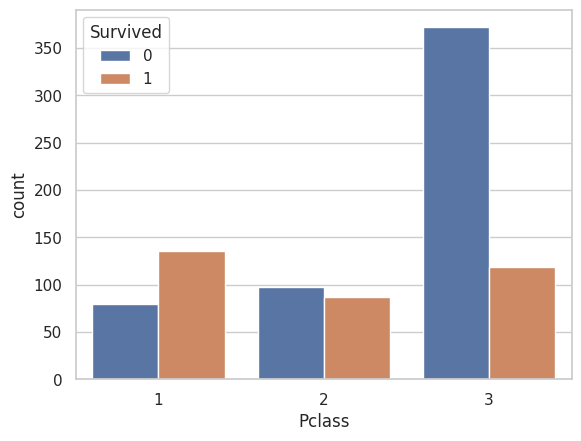

In [ ]:
sns.countplot(x="Pclass",hue="Survived",data=titanic_data)

In [ ]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
titanic_data["Embarked"].value_counts()

,count
Embarked,
S,646
C,168
Q,77


# **converting categorial columns**

In [ ]:
titanic_data.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

/tmp/ipython-input-37-2950400629.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)


In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# **Separating feature and targets**


In [ ]:
x=titanic_data.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
y=titanic_data["Survived"]
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_train_prediction=model.predict(x_train)
print(x_train_prediction)

[0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 1 

In [ ]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("Accuracy sore of traning data:",training_data_accuracy)

Accuracy sore of traning data: 0.8061797752808989


In [ ]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1]


In [ ]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("Accuracy sore of testing data:",test_data_accuracy)

Accuracy sore of testing data: 0.8156424581005587


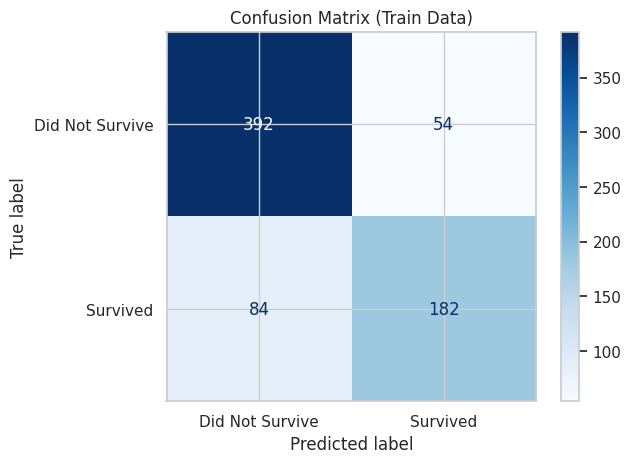

In [ ]:


cm = confusion_matrix(y_train, x_train_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did Not Survive", "Survived"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Train Data)')
plt.show()
